# TP Final - Redes Neuronales Convolucionales
## Mellino, Natalia - Introducción al Aprendizaje Automatizado

In [4]:
# Imports

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Ejemplo

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

## Ejercicio 1

In [12]:
def ej1():
  # Agregamos las capas
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )

  return history, model

In [13]:
history, model = ej1()

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5487 - accuracy: 0.4237 - val_loss: 1.3047 - val_accuracy: 0.5334
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1273 - accuracy: 0.6009 - val_loss: 1.0793 - val_accuracy: 0.6207
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9511 - accuracy: 0.6613 - val_loss: 0.9040 - val_accuracy: 0.6831
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8366 - accuracy: 0.7049 - val_loss: 0.8736 - val_accuracy: 0.6959
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7629 - accuracy: 0.7313 - val_loss: 0.8417 - val_accuracy: 0.7121
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6992 - accuracy: 0.7516 - val_loss: 0.8384 - val_accuracy: 0.7093
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6325 - accuracy: 0.7760 - val_loss: 0.8395 - val_accuracy:

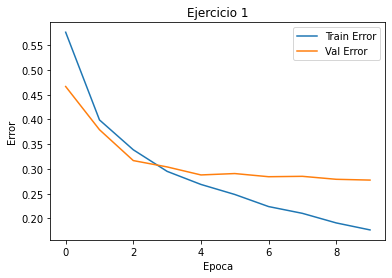

In [28]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(list(train_error), label='Train Error')
plt.plot(list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 1')
plt.show()


In [27]:
# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final {1 - test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 251.2352 - accuracy: 0.4872
Test error en el modelo final 0.512800008058548


### Conclusiones

ta malisimo la verda creo que hay un toq de overfitting 